### 1. Mount GDRIVE

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2. About Data
This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .

Content
It contains the following 6 fields:

target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

ids: The id of the tweet ( 2087)

date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

flag: The query (lyx). If there is no query, then this value is NO_QUERY.

user: the user that tweeted (robotickilldozr)

text: the text of the tweet (Lyx is cool)

Acknowledgements
The official link regarding the dataset with resources about how it was generated is here
The official paper detailing the approach is here

Citation: Go, A., Bhayani, R. and Huang, L., 2009. Twitter sentiment classification using distant supervision. CS224N Project Report, Stanford, 1(2009), p.12.

Inspiration
To detect severity from tweets. You may have a look at this.

https://www.kaggle.com/kazanova/sentiment140

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/ML/Projects/training.1600000.processed.noemoticon.csv", header=None, encoding= "latin")

In [4]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
# imports

import matplotlib.pyplot as plt
import seaborn as sns
color= sns.color_palette()

%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go

import plotly.tools as tls
import plotly.express as px


## 2. Data cleaning

In [5]:
df.columns = ["sentiment", "id", "date", "query", "user_id", "text"]

In [6]:
df.sample(5)

,sentiment,id,date,query,user_id,text
183363,0,1967405996,Fri May 29 19:31:16 PDT 2009,NO_QUERY,KellyMurphy8,"At the cape, so excited to be here.. It just d..."
1404831,4,2055091328,Sat Jun 06 08:40:53 PDT 2009,NO_QUERY,aussievb,Can't wait to go to Newcastle tomorrow and see...
991807,4,1835167393,Mon May 18 05:19:17 PDT 2009,NO_QUERY,sidrodrigues,@StaticKing Shocking! The only way to raise a ...
1063290,4,1964417756,Fri May 29 14:12:12 PDT 2009,NO_QUERY,Court_Sullivan,at the lake for the weekend; catching some sun...
876640,4,1684765374,Sat May 02 21:59:04 PDT 2009,NO_QUERY,khopkinson,@Ines Nite Mojito dreams #twitterqueens


In [7]:
df = df.drop(["id", "date", "query", "user_id"], axis=1)

In [8]:
label_m = {0: "Negative", 4: "Positive"}
def label_map(label):
  return label_m[label]

In [9]:
df.sentiment = df["sentiment"].apply(lambda x: label_map(x))

In [10]:
df

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,Positive,Just woke up. Having no school is the best fee...
1599996,Positive,TheWDB.com - Very cool to hear old Walt interv...
1599997,Positive,Are you ready for your MoJo Makeover? Ask me f...
1599998,Positive,Happy 38th Birthday to my boo of alll time!!! ...


In [11]:
val_count = df.sentiment.value_counts()

In [13]:
fig = px.bar(df, x = ["Negative", "Positive"], y = val_count)
fig.update_traces(marker_color="turquoise", marker_line_color="rgb(8,48,107)", marker_line_width =1.5)
fig.update_layout(bargap=0.2)
fig.update_layout(title_text = "Sentiment Data dist.")
fig.show()

*Lucky for me, data is balanced and no skewness*

### Let's look at the text now

In [14]:
import random
## generate randome index
random_idx =[random.randint(1, len(df.text)) for i in range(15)] # generate random 15 indexes
df.loc[random_idx,:].head(15)

,sentiment,text
765321,Negative,@wrong_girl Droga.
969947,Positive,At a baby shower with my bitches.
510593,Negative,The level of participation among people is jus...
1310115,Positive,lol this is really really really boring...
1549591,Positive,Coffee and Email time...Looks like I may have ...
408021,Negative,I really wish that inquery would have held up ...
1319493,Positive,@RVDS Thank you
549580,Negative,Just read their messages I LOVE U GUYS SOOOOOO...
1200230,Positive,amazinggg. i loveddd the taylor swift special....
452866,Negative,Done hanging with my bestfriends from ct home...


*Data looks nasty. It make sense as we do use a lot of punctuation and other words without any contextual meaning while tweeting*

Lets get rid of these punctuation and other words ;)

### 3. Texts preprocessing

Tweet texts often consists of other user mentions, hyperlink texts, emoticons and punctuations. In order to use them for learning using a Language Model. We cannot permit those texts for training a model. 


In [12]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
stopwords = stopwords.words('english')
stemmer = SnowballStemmer('english')

In [14]:
import re 
# using regex to remove hyperlinks and other using links
text_clean = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [15]:
df1 = df.copy()
x = df1.text[15]


In [16]:
x

'@iamjazzyfizzle I wish I got to watch it with you!! I miss you and @iamlilnicki  how was the premiere?!'

In [17]:
xx = re.sub(text_clean, ' ', str(x).lower()).strip()
z = []
for token in xx.split():
   z.append(token)
print (z)
" ".join(z)

['i', 'wish', 'i', 'got', 'to', 'watch', 'it', 'with', 'you', 'i', 'miss', 'you', 'and', 'iamlilnicki', 'how', 'was', 'the', 'premiere']


'i wish i got to watch it with you i miss you and iamlilnicki how was the premiere'

In [18]:
for i, words in enumerate(stopwords):
  if words=="good":
    print (i, words)
    break

In [19]:
stopwords[118]

'not'

In [20]:
# function to cleanup the text
def preprocess(text, stem=False):
  text = re.sub(text_clean, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stopwords:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)


In [21]:
df1 = df.copy()

In [22]:

df1.text = df1.text.apply(lambda x: preprocess(x))

In [23]:
df1["text"].sample(15)

574601                 woke today seem type right keep typos
200888                              feels like wasted day fb
26281      believe sunday already wanna go back work blah...
1223878                        thanks tips come really handy
746002     ahhh im sorry body aching today miss u tho eve...
1597509              haveyouever broken window sth like haha
339704     feeling fat major bad times apprentice tonight...
636635     ok got back computer find many tweets photos g...
480956     star pixie saw one forums disappointingly cat ...
1346283                                   fnwc early edition
956942           compared meerkats yesterday liked loki best
1527733                                      joining twitter
956371                          heey im wondering cam bought
1406830      handsome young man quite swaddle nolan adorable
914978                                                 never
Name: text, dtype: object

In [24]:
df.text.loc[1161807]

'I want a new bike  .. my old is so .. hmpfgh..'

In [25]:
df1.text.loc[1161807]

'want new bike old hmpfgh'

## For Postive Words

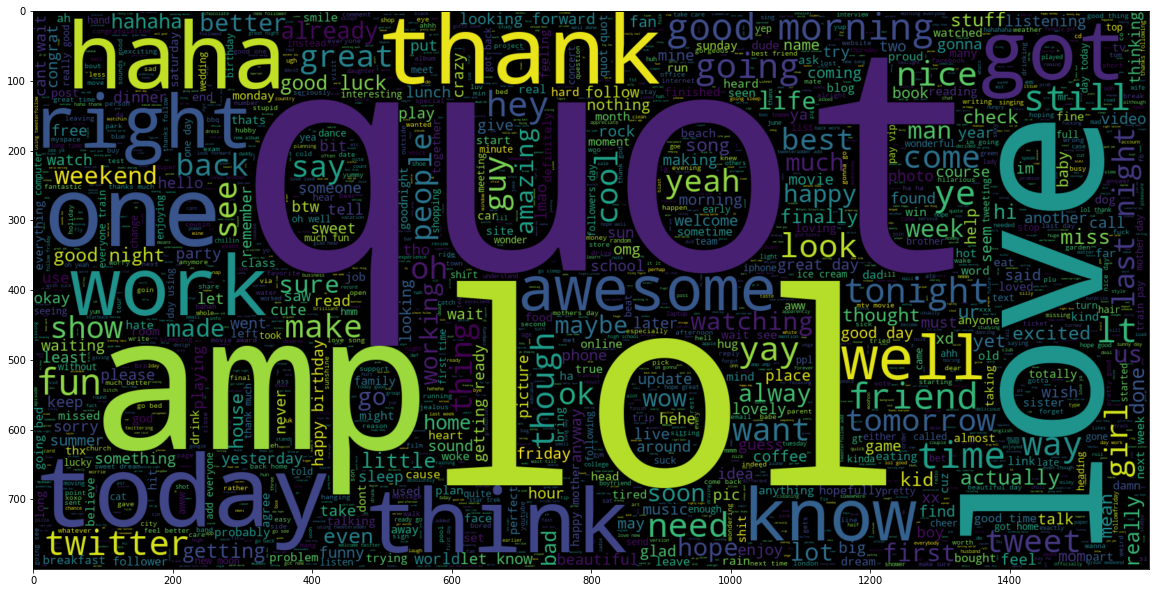

In [52]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df1[df1.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

## For Negative Words

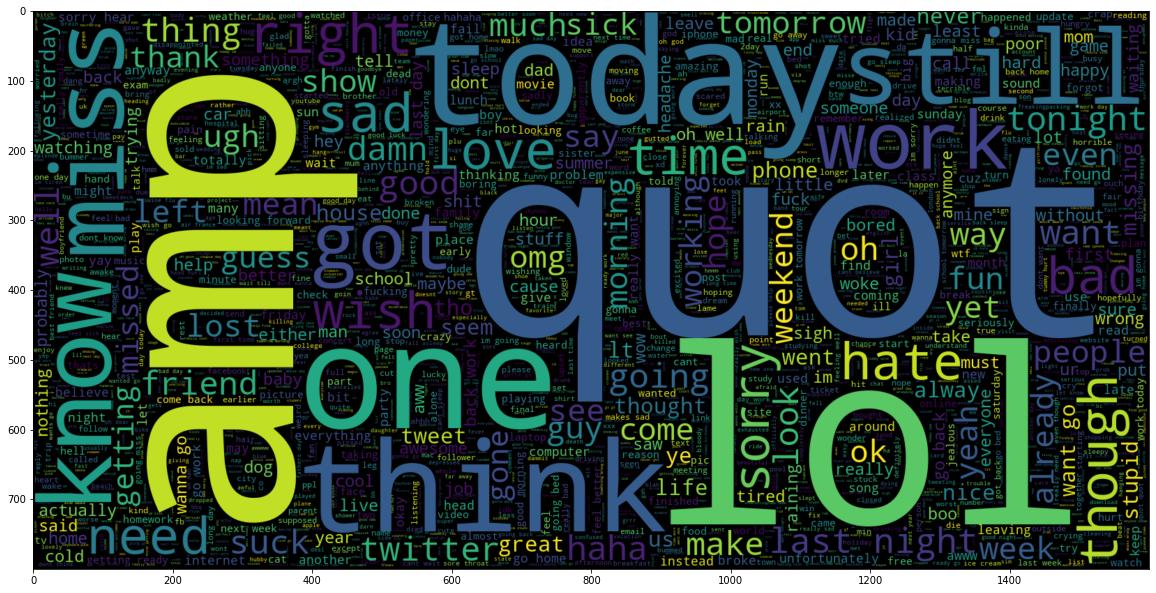

In [53]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df1[df1.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

*I think words like good and quote can be removed from the above texts if you are planning to use rule based classification. I am keeping it asis because LSTM should be able to recognize the context of these word use*

## 3. Train & Test Split

In [26]:
## Fixed parameter 
Train_size = 0.8
Max_words = 100000
Max_seq_len = 30

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [28]:
train_data, test_data = train_test_split(df1, test_size =1- Train_size, random_state =7)

In [29]:
# length of test size
print ("length of test data")
len(test_data)

length of test data


320000

In [30]:
print ("length of train data")
len(train_data)

length of train data


1280000

## 4. Tokenization
**tokenizer** create tokens for every word in the data corpus and map them to a index using dictionary.

**word_index** contains the index for each word

**vocab_size** represents the total number of word in the data corpus



In [31]:
from keras.preprocessing.text import Tokenizer

tokenizer =Tokenizer()
tokenizer.fit_on_texts(train_data.text)

In [32]:
word_index= tokenizer.word_index

In [33]:
len(word_index)

290574

In [34]:
vocab_size = len(tokenizer.word_index)+1 ## + 1 for dealing with EOS

In [35]:
vocab_size 

290575

Since we created tokenizer object, which can be convert any word into a key of dictionary mapped to a number.

We are going to build a sequence model. We should feed in a sequence of numbers to it. And our text column has variation of count of words. We will ensure no variance by using padding

In [36]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text), maxlen = Max_seq_len)

In [37]:
x_test= pad_sequences(tokenizer.texts_to_sequences(test_data.text),maxlen = Max_seq_len )

In [38]:
print ("Train size:", x_train.shape)

Train size: (1280000, 30)


In [39]:
print ("Test Size:" ,x_test.shape)

Test Size: (320000, 30)


## 5. Label Encoding

In [40]:
encoder = LabelEncoder()

In [41]:
encoder.fit(train_data.sentiment.to_list())

LabelEncoder()

In [42]:
y_train = encoder.transform(train_data.sentiment.tolist())

In [43]:
y_test = encoder.transform(test_data.sentiment.tolist())

In [44]:
## To make X and Y shape compatible (Expanding y by one dimension)
y_train= y_train.reshape(-1,1)
y_test= y_test.reshape(-1,1)

In [45]:
y_train.shape

(1280000, 1)

In [46]:
y_test.shape

(320000, 1)

## 6. Word Embedding

Word Embedding is one of the popular representation of document vocabulary.It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc. Basically, it's a feature vector representation of words which are used for other natural language processing applications.
I could train the embedding ourselves but that would take a while to train. So I m going in the path of Computer Vision, here use Transfer Learning

The pretrained Word Embedding like GloVe & Word2Vec gives more insights for a word which can be used for classification.

In [50]:
f= open("/content/drive/MyDrive/ML/Projects/glove.6B.300d.txt", "r")
file = f.readlines() # Read line by line (v.important dont use read)
f.close()

In [51]:
import numpy as np
embedding_index= {}
for line in file:
  values = line.split()
  word= value = values[0] # first value is key
  coefs = np.asarray(values[1:], dtype="float32") # rest values are vector rep of the key
  embedding_index[word]= coefs

In [53]:
print('Found %s word vectors.' %len(embedding_index))

Found 400000 word vectors.


In [59]:
len(embedding_index["good"])

300

In [61]:
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS =10
Model_path = "/content/drive/MyDrive/ML/Projects/best_model.hdf5"

In [66]:
len(word_index.items())

290574

In [63]:
# Define embdedding matrix -(vocab_size, EMBEDDING_DIM)
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM)) # initilize embedding matrix

for word ,i in word_index.items():
  embedding_vector = embedding_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i]= embedding_vector



In [73]:
for word ,i in word_index.items():
  if i == 290574:
    print (word)
    break

aussino


## 7. Train a LSTM RNN
As one can see in the word cloud, the some words are predominantly feature in both Positive and Negative tweets. This could be a problem if I use a Machine Learning model like Naive Bayes, SVD, etc. Hence I am going to use a sequence model.

RNN can handle a sequence of data and learn a pattern of input sequence or scalar value as output.

For Model architecture

1.   Embedding Layer: For generating vector for each input sequence
2.   ConV1D layer: Extracting features and convolve into smaller feature vector

3. LSTM: Long Short Term Memory is a variant of RNN, which has memory state cell to learn the context of words which are further along the text to carry contextual meaning.

4. Dense: Fully connected layer for classification




In [77]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Embedding


In [78]:
embedding_layer = Embedding(
    vocab_size,
    EMBEDDING_DIM,
    weights=[embedding_matrix],
    input_length= Max_seq_len,
    trainable=False
)

In [81]:
from tensorflow.keras import Model

In [82]:
seq_input= Input(shape=(Max_seq_len,), dtype="int32")
embedding_seq = embedding_layer(seq_input)

X = SpatialDropout1D(0.2)(embedding_seq)
X = Conv1D(64,5, activation="relu")(X)
X = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(X)

X= Dense(512, activation = "relu")(X)
X= Dropout(0.5)(X)

X= Dense(512, activation = "relu")(X)
outputs = Dense(1, activation= "sigmoid")(X)
model = Model(seq_input, outputs)

In [83]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding (Embedding)       (None, 30, 300)           87172500  
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 30, 300)          0         
 lDropout1D)                                                     
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 64)            96064     
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 512)               66048 

### 7.1 Optimization and Callbacks
This notebook uses Adam, optimization algorithm for Gradient Descent.

Callbacks are special functions which are called at the end of an epoch. We can use any functions to perform specific operation after each epoch. I used two callbacks here,


1.   LRScheduler - It changes a Learning Rate at specfic epoch
2.   ModelCheckPoint - It saves best model while training based on some metrics. Here, it saves the model with minimum Validity Loss.



In [84]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss="binary_crossentropy", metrics=["accuracy"])

ReduceLROnPlateau= ReduceLROnPlateau(factor=0.1,
                                     min_lr= 0.01,
                                     monitor="val_loss",
                                     verbose =1)

In [87]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [88]:
history = model.fit(x_train, y_train, 
                    batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data= (x_test, y_test),
                    callbacks =[ReduceLROnPlateau])

Epoch 1/10
1250/1250 [==============================] - 256s 192ms/step - loss: 0.5194 - accuracy: 0.7391 - val_loss: 0.4839 - val_accuracy: 0.7663 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 239s 191ms/step - loss: 0.4875 - accuracy: 0.7624 - val_loss: 0.4713 - val_accuracy: 0.7737 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 238s 190ms/step - loss: 0.4768 - accuracy: 0.7693 - val_loss: 0.4654 - val_accuracy: 0.7774 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 240s 192ms/step - loss: 0.4707 - accuracy: 0.7732 - val_loss: 0.4628 - val_accuracy: 0.7785 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 238s 191ms/step - loss: 0.4660 - accuracy: 0.7762 - val_loss: 0.4615 - val_accuracy: 0.7787 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - 238s 190ms/step - loss: 0.4626 - accuracy: 0.7782 - val_loss: 0.4587 - val_accuracy: 0.7807 - lr: 0.0010
Epoch 7/10
1250/1250 [============

In [89]:
model.save(Model_path) # save HDF5 for model

## 8. Model Evaluation

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


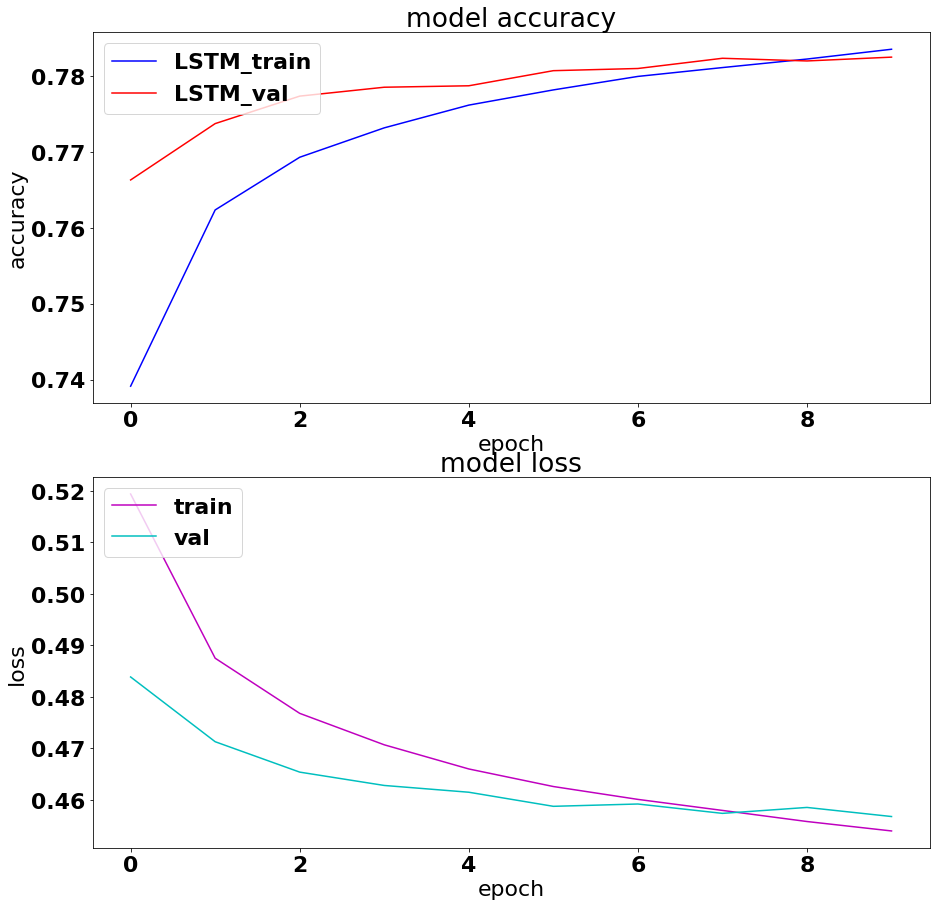

In [97]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
s, (at, al) = plt.subplots(2,1,figsize=(15,15))
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [98]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"

In [99]:
scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

32/32 [==============================] - 6s 132ms/step


In [100]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [101]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


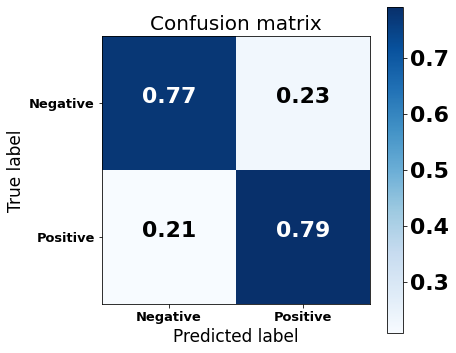

In [102]:
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

**It's a pretty good model we trained here in terms of NLP. Around 80% accuracy is good enough considering the baseline human accuracy also pretty low in these tasks.**